# Symbol

In [22]:
import mxnet as mx
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a + b
(a, b, c)

(<Symbol a>, <Symbol b>, <Symbol _plus2>)

# Let's see what we have done in graph

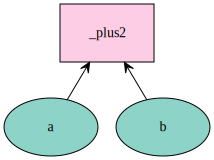

In [23]:
mx.viz.plot_network(symbol=c)

# Scalar, Vector, Matrix???????

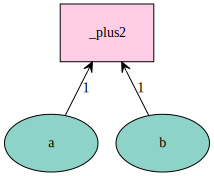

In [24]:
shape = {'a':(1,1),'b':(1,1)} #follow NCHW
mx.viz.plot_network(symbol=c,shape=shape)

# Numerical Results

In [25]:
a_val = mx.nd.ones((10,10),ctx=mx.cpu()) #use mx.gpu(#) if you are tuhao or you use AWS
b_val = mx.nd.ones((10,10),ctx=mx.cpu())
exe = c.bind(ctx=mx.cpu(0),args={'a':a_val, 'b':b_val})
exe

In [26]:
f = exe.forward()
f

[
 [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
  [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]
 <NDArray 10x10 @cpu(0)>]

In [27]:
f[0].asnumpy()

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]], dtype=float32)

# Let's do the same thing in NDArray section, with better big picture

In [28]:
data = mx.sym.Variable('data')
label = mx.sym.Variable('softmax_label')

def cnn(x):
    w_c = mx.sym.Variable('w_c')
    conv = mx.sym.Convolution(data=data, weight=w_c, num_filter=32, kernel=(3,3), stride=(2,2), pad=(1,1), name='first_conv', no_bias=True)
    act = mx.sym.Activation(data=conv, act_type='relu', name='first_relu')
    pool = mx.sym.Pooling(data=act,stride=(2,2),kernel=(2,2),pool_type='max', name='first_pool')
    w_fc = mx.sym.Variable('w_fc')
    fc = mx.sym.FullyConnected(data=pool, weight=w_fc, num_hidden=10, name='first_fc',no_bias=True)
    logit = fc
    return logit

def cross_entropy(logit,y):
    return mx.sym.SoftmaxOutput(data=logit,label=y, name="Softmax")
logit = cnn(data)
loss = cross_entropy(logit,label)
loss

<Symbol Softmax>

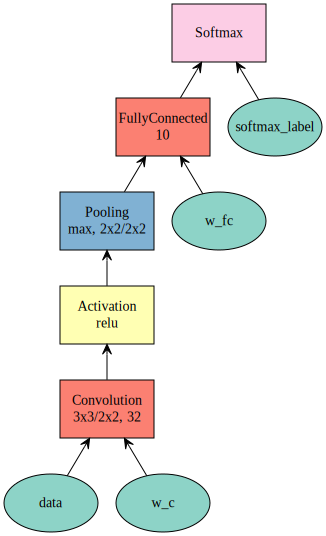

In [29]:
mx.viz.plot_network(loss)

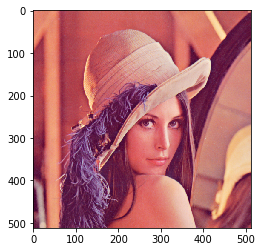

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
img_numpy = plt.imread('Lenna.png')
plt.imshow(img_numpy) # asnumpy is the magic communicating numpy and mxnet NDarray 
plt.show()

img_T = img_numpy.transpose(1,2,0).reshape((1,3,512,512))
img_mx = mx.nd.array(img_T, ctx=mx.cpu())
label_mx = mx.nd.array([1], ctx=mx.cpu())
w_c_init_mx = mx.nd.array(np.ones((32,3,3,3)),ctx=mx.cpu())
w_fc_init_mx = mx.nd.array(np.ones((10,524288)),ctx=mx.cpu())
exe = loss.bind(ctx=mx.cpu(0),args={'data':img_mx, 
                                 'softmax_label':label_mx, 
                                 'w_c':w_c_init_mx,
                                 'w_fc':w_fc_init_mx})

In [31]:
y = exe.forward()
y[0].asnumpy()

array([[ 0.08851561,  0.08851561,  0.08851561,  0.08851561,  0.08851561,
         0.08851561,  0.08851561,  0.08851561,  0.14593756,  0.14593756]], dtype=float32)